### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
#Sklearn
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

#other
import concurrent.futures
import time
import pyLDAvis.sklearn
from pylab import bone, pcolor, colorbar, plot, show, rcParams, savefig
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

# Plotly 
from plotly import tools
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

#spaCy
import spacy
nlp = spacy.load("fr_core_news_lg")
from spacy.lang.fr.stop_words import STOP_WORDS
from spacy.lang.fr import French
import string
punctuations = string.punctuation
stopwords = list(STOP_WORDS)

### Load (acceptably clean) data

In [2]:
data=pd.read_pickle("../../data/nodesc_clean.pkl")
data_np=data.to_numpy()

In [3]:
i=5648
data_np[i]

'calendrier et résultats toulouse olympique 13. championship rugby sport toxiii'

In [13]:
import progressbar
bar = progressbar.ProgressBar(maxval=len(data_np), \
    widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])


In [9]:
data_np_noloc=np.load('../../data/data_np_noloc.npy', allow_pickle=True)

In [10]:
spacy.displacy.render(nlp(data_np_noloc[2]), style='ent',jupyter=True)

## Process data to extract keywords only

### Remove the locs (there might be a better way)

In [4]:
def remove_locs(doc):
    all_locs=[]
    bar.start()
    for i in range(len(doc)):
        temp = ""
        for token in nlp(doc[i]):
            if not token.ent_type_=='LOC':
                temp += token.text
                if token.whitespace_:
                    temp += " "
            else:
                all_locs.append(token.text)
        doc[i]=temp
        bar.update(i+1)
    bar.finish()
    return(doc, set(all_locs))

In [5]:
#data_np_noloc=data_np
#data_np_noloc, locs=remove_locs(data_np_noloc)
locs={'..',
 '20',
 'abit',
 'abondant',
 'abos',
 'adour',
 'ads',
 'aeroport',
 'agenda',
 'agrees',
 'ajaccien',
 'alea',
 'algue',
 'alpes',
 'aquitain',
 'aquitaine',
 'ardèche',
 'armentières',
 'arrest',
 'artificialisée',
 'artois',
 'arzel',
 'astaffort',
 'atlantique',
 'atlantiques',
 'auberge',
 'aubigny',
 'augustins',
 'auron',
 'auvergne',
 'axareal',
 'azur',
 'baie',
 'baliros',
 'barbery',
 'bardos',
 'barrières',
 'bas',
 'bassin',
 'bazens',
 'bd',
 'belle',
 'bezing',
 'billancourt',
 'biota',
 'biotopes',
 'bièvre',
 'boundaries',
 'bourbince',
 'bourgogne',
 'bretagne',
 'briel',
 'brou',
 'c.',
 'cadastrale',
 'cafe',
 'canal',
 'canton',
 'carbonnel',
 'carthage',
 'cdif',
 'centre',
 'cezeracq',
 'chambre',
 'charente',
 'charentes',
 'charnay',
 'chateauneuf',
 'chaville',
 'chevaigne',
 'chu',
 'ciel',
 'cimiez',
 'commnne',
 'competence',
 'comté',
 'conseil',
 'controle',
 'coquette',
 'cormeilles',
 'corse',
 'craon',
 'crotoy',
 'cugn',
 'cézéracq',
 'côte',
 "d'",
 'darcachon',
 'de',
 'denis',
 'departement',
 'departemental',
 'departementale',
 'departements',
 'des',
 'donnee',
 'donnees',
 'doubs',
 'dpo',
 'du',
 'dunaire',
 'département',
 'ec',
 'eco',
 'europe',
 'europeenne',
 'europeennes',
 'evaluation',
 'fauillet',
 'ferté',
 'flibeaucourt',
 'france',
 'franche',
 'français',
 'françois',
 'garonne',
 'gascogne',
 'gavaudun',
 'generique',
 'gironde',
 'golfe',
 'goulven',
 'grand',
 'guadeloupe',
 'guyane',
 'gâvres',
 'habitats',
 'hacha',
 'hallon',
 'igp',
 'ile',
 'inde',
 'indien',
 'infolocale',
 'inland',
 'intercommunalite',
 'intertidal',
 'intertidaux',
 'iroise',
 'isere',
 'isohypses',
 'issy',
 'isère',
 'jaugeages',
 "l'",
 'l.',
 'la',
 'landes',
 'lascaris',
 'les',
 'lezons',
 'limousin',
 'loir',
 'loire',
 'lot',
 'lès',
 'manche',
 'marmande',
 'marne',
 'martinsart',
 'massif',
 'matisse',
 'meillon',
 'metropole',
 'metropolitaine',
 'mettis',
 'metz',
 'meuble',
 'meudon',
 'milieu',
 'montdidier',
 'montpellier',
 'moulineaux',
 'moulins',
 'musee',
 'méditerranée',
 'métropode',
 'métropole',
 'nan',
 'nancy',
 'nantaise',
 'nantes',
 'necmergitur',
 'nice',
 'nogent',
 'nonneuse',
 'nord',
 'normandie',
 'nousty',
 'néerlandais',
 'octeville',
 'olonne',
 'or',
 'orly',
 'orléans',
 'orne',
 'ouche',
 'ouen',
 'paache',
 'pache',
 'parc',
 'paris',
 'passerelle',
 'pays',
 'pierre',
 'piétat',
 'poitiers',
 'poitou',
 'ponctuel',
 'prevision',
 'provence',
 'pyrénées',
 'qualiville',
 'quesnoy',
 'region',
 'regions',
 'reglementat',
 'relais',
 'repere',
 'reserves',
 'residence',
 'resultat',
 'resultats',
 'reunion',
 'rhin',
 'rhone',
 'rhus',
 'rhône',
 'rica',
 'riscle',
 'rogerville',
 'rolleville',
 'rue',
 'région',
 'réunion',
 'sableuse',
 'saint',
 'saone',
 'sarthe',
 'saône',
 'seille',
 'seine',
 'sejou',
 'semoy',
 'sentier',
 'sevres',
 'sinp',
 'somme',
 'sommellerie',
 'soubiran',
 'specialisee',
 'square',
 'stq',
 'stsisi',
 'subtidaux',
 'sud',
 'sully',
 'tamm',
 'tarn',
 'teil',
 'territoires',
 'tomblaine',
 'toulouse',
 'trentennale',
 'unienville',
 'val',
 'vallee',
 'vallée',
 'vanves',
 'vichy',
 'villeneuve',
 'villeur',
 'virac',
 'y.',
 'yerres',
 'yvette',
 'zfu',
 'île'}

In [10]:
locs.remove('alea')

In [48]:
locs

{'..',
 '20',
 'abit',
 'abondant',
 'abos',
 'adour',
 'ads',
 'aeroport',
 'agenda',
 'agrees',
 'ajaccien',
 'alea',
 'algue',
 'alpes',
 'aquitain',
 'aquitaine',
 'ardèche',
 'armentières',
 'arrest',
 'artificialisée',
 'artois',
 'arzel',
 'astaffort',
 'atlantique',
 'atlantiques',
 'auberge',
 'aubigny',
 'augustins',
 'auron',
 'auvergne',
 'axareal',
 'azur',
 'baie',
 'baliros',
 'barbery',
 'bardos',
 'barrières',
 'bas',
 'bassin',
 'bazens',
 'bd',
 'belle',
 'bezing',
 'billancourt',
 'biota',
 'biotopes',
 'bièvre',
 'boundaries',
 'bourbince',
 'bourgogne',
 'bretagne',
 'briel',
 'brou',
 'c.',
 'cadastrale',
 'cafe',
 'canal',
 'canton',
 'carbonnel',
 'carthage',
 'cdif',
 'centre',
 'cezeracq',
 'chambre',
 'charente',
 'charentes',
 'charnay',
 'chateauneuf',
 'chaville',
 'chevaigne',
 'chu',
 'ciel',
 'cimiez',
 'commnne',
 'competence',
 'comté',
 'conseil',
 'controle',
 'coquette',
 'cormeilles',
 'corse',
 'craon',
 'crotoy',
 'cugn',
 'cézéracq',
 'côte',


### Remove stopwords and special loc list

In [6]:
special_words=['données', 'open', 'data', 'commune','–', '.', '\'',':', 'brest','mayenne','region', 'departement', 'communes', 'canton', 'publique', 'publiques', 'public', 'publics', 'cantons', 'territoires', 'liste', 'public', 'risque', 'risques', 'zone', 'ouverte', 'ouvertes', 'zones', 'territoire', 'donnée', 'métropole', 'opendata', 'rhin', 'landes', 'loire', 'savoie', 'oise', 'document','zonage', 'departemental', 'communal', 'inspire','régionale', 'département', 'territoriales', 'territoriale', 'ouvertes', 'ville', 'haute', 'haut', 'bas', 'basse', 'alpes', 'rhone', 'auvergne', 'nan']

In [50]:
stopwords_full=special_words+list(locs)+stopwords

In [51]:
stopwords_full

['données',
 'open',
 'data',
 'commune',
 '–',
 '.',
 "'",
 ':',
 'brest',
 'mayenne',
 'region',
 'departement',
 'communes',
 'canton',
 'publique',
 'publiques',
 'public',
 'publics',
 'cantons',
 'territoires',
 'liste',
 'public',
 'risque',
 'risques',
 'zone',
 'ouverte',
 'ouvertes',
 'zones',
 'territoire',
 'donnée',
 'métropole',
 'opendata',
 'rhin',
 'landes',
 'loire',
 'savoie',
 'oise',
 'document',
 'zonage',
 'departemental',
 'communal',
 'inspire',
 'régionale',
 'département',
 'territoriales',
 'territoriale',
 'ouvertes',
 'ville',
 'haute',
 'haut',
 'bas',
 'basse',
 'alpes',
 'rhone',
 'auvergne',
 'nan',
 'canal',
 'departement',
 'passerelle',
 'cimiez',
 'meudon',
 'agenda',
 'la',
 'tamm',
 'donnee',
 'barrières',
 'bretagne',
 'sinp',
 'manche',
 'vanves',
 'sully',
 'intertidal',
 'metropolitaine',
 'montpellier',
 'aquitaine',
 'marmande',
 'arzel',
 'commnne',
 'poitou',
 'region',
 'auron',
 'cezeracq',
 'ciel',
 'billancourt',
 'denis',
 'baliros',

In [207]:
parser=French()
def spacy_tokenizer(sentence):
    tokens=parser(sentence)
    tokens = [ word.lower_ for word in tokens ]
    tokens = [ word for word in tokens if word not in stopwords_full]
    tokens = " ".join([i for i in tokens])
    return tokens

def basic_tokenizer(sentence):
    tokens=parser(sentence)
    tokens = [ word.lower_ for word in tokens ]
    tokens = [ word for word in tokens if word not in stopwords]
    tokens = " ".join([i for i in tokens])
    return tokens


In [53]:
data_np_nostop=[]
bar.start()
for i in range(len(data_np)):
    data_np_nostop.append(spacy_tokenizer(data_np[i]))
    bar.update(i+1)
bar.finish()

IOPub message rate exceeded.=======================================      ]  92%
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [13]:
data_flat1=''.join(data_np_nostop)

In [14]:
len(data_flat1)

3760980

In [38]:
from collections import Counter

# all tokens that arent stop words or punctuations
words = [token.text for token in nlp(data_flat1[:1000000])] 

# five most common tokens
word_freq = Counter(words)
common_words = word_freq.most_common(500)

In [39]:
common_words

[('geospatial', 984),
 ('prise', 855),
 ('budget', 801),
 ('environnement', 736),
 ('citoyennete', 698),
 ('transport', 690),
 ('information', 665),
 (' ', 640),
 ('eau', 612),
 ('sols', 600),
 ('mayenne', 597),
 ('geoscientific', 595),
 ('finances', 578),
 ('pedologiques', 536),
 ('ortho', 530),
 ('localisation', 521),
 ('orthophotographie', 458),
 ('administration', 454),
 ('casq', 451),
 ('photo', 434),
 ('vue', 433),
 ('inondation', 421),
 ('pollution', 412),
 ('amenagement', 405),
 ('culture', 374),
 ('gtfs', 373),
 ('réseau', 369),
 ('logement', 369),
 ('vues', 367),
 ('transports', 365),
 ('air', 348),
 ('primitif', 328),
 ('administratif', 327),
 ('54', 312),
 ('ddt', 310),
 ('developpement', 309),
 ('patrimoine', 297),
 ('cd', 296),
 ('bus', 293),
 ('equipements', 292),
 ('53', 290),
 ('qualite', 289),
 ('cartes', 289),
 ('meteo', 287),
 ('mobilite', 276),
 ('types', 273),
 ('etudes', 269),
 ('economie', 268),
 ('pedologie', 268),
 ('adresse', 267),
 ('pprn', 264),
 ('sante', 

### Simple Projections

In [14]:
data_np_nostop=data_np_noloc

In [15]:
vectors=[]
bar.start()
for i in range(len(data_np)//3):
    vectors.append(nlp(data_np_nostop[i]).vector)
    bar.update(i+1)
bar.finish()

[========================================================================] 100%


In [24]:
nlp(data_np_nostop[453])

'données du portail d’information trouver mon master tmm lieux de formation. . ce jeu de données présente les informations destinées au portail trouver mon master au titre de l’année universitaire . ces informations sont fournies par les établissements accrédités en vue de la délivrance de diplômes nationaux de . le portail en effet pour vocation de recenser l’ensemble des dnm existants. il ne recense ni les autres diplômes conférant grade de master ni les autres diplômes du deuxième cycle universitaire. pour en savoir plus consultez la documentation dédiée aux trois jeux de donnees du portail dinformation trouver mon master mentions de master attachments descriptif relatifs aux informations destinées au portail trouver .. adresses postales business developpement economique education emploi enseignement enseignement superieur etablissement etablissements formation formations geolocalisation grand etablissement grands etablissements master master lmd pme recherche tmm uai universite uni

In [26]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=40)
pca.fit(vectors)
vectors_pca=pca.transform(vectors)

In [27]:
pca.explained_variance_ratio_

array([0.19229983, 0.12747149, 0.08510949, 0.0617465 , 0.05134224,
       0.03700298, 0.03650363, 0.02593797, 0.02309186, 0.02071904,
       0.01917212, 0.01680801, 0.01483218, 0.01264127, 0.01200923,
       0.01100737, 0.0099373 , 0.00896721, 0.00848197, 0.00791144,
       0.00741915, 0.00737072, 0.00661675, 0.00606335, 0.00575441,
       0.0055471 , 0.00552672, 0.00527732, 0.00493092, 0.00480065,
       0.00472615, 0.00419776, 0.0039829 , 0.00379603, 0.00352269,
       0.0033254 , 0.00327075, 0.00307533, 0.00301943, 0.00285469])

In [35]:
j=random.randint(len(data_np)//3, len(data_np))
#my_sentence='Agriculture biologique productions animales bio'
x=nlp(data_np_nostop[j]).vector
#x=nlp(my_sentence).vector
print(data_np_nostop[j])
#print(data_np[j])

budget par secteurs autorisations de programme ap . . budget par secteurs autorisations de programme ap . budget regional finances publiques


In [30]:
pca.explained_variance_ratio_

array([0.19229983, 0.12747149, 0.08510949, 0.0617465 , 0.05134224,
       0.03700298, 0.03650363, 0.02593797, 0.02309186, 0.02071904,
       0.01917212, 0.01680801, 0.01483218, 0.01264127, 0.01200923,
       0.01100737, 0.0099373 , 0.00896721, 0.00848197, 0.00791144,
       0.00741915, 0.00737072, 0.00661675, 0.00606335, 0.00575441,
       0.0055471 , 0.00552672, 0.00527732, 0.00493092, 0.00480065,
       0.00472615, 0.00419776, 0.0039829 , 0.00379603, 0.00352269,
       0.0033254 , 0.00327075, 0.00307533, 0.00301943, 0.00285469])

In [36]:
y=pca.transform([x])

In [32]:
from scipy import spatial
A = vectors_pca 
tree = spatial.KDTree(A)

In [37]:
dist, pos=tree.query(y, k=30)
print(dist)
print(pos)

[[5.95428044 6.00338885 6.38455106 6.64082447 6.78432923 6.95051256
  7.21883527 7.21883527 7.26326154 7.29842479 7.29957278 7.35933502
  7.42182211 7.45272177 7.51497976 7.54944961 7.55721988 7.56793525
  7.60976573 7.63998648 7.65496334 7.65640082 7.68928858 7.69275405
  7.75013448 7.75618406 7.77757985 7.7898938  7.82266884 7.83445236]]
[[ 9442  7849  2553 11540  5270  5277 12620 12621  3309  9430  5783  3201
   9593 12960 11952 12961  6236  1360  5472  5852 10851  9481  5694  9209
   9351 11524  2144  1889 14178  5286]]


In [38]:
for k in range(pos.shape[1]):
    print(data_np[pos[0][k]])

maet nombre de contrats. agriculture environnement plan agroenvironnemental
budget bp de la région centre val de loire par politique publique régionale. budget budget primitif citoyennete institution finances
budget primitif et compte administratif . budget budget compte administratif compte administratif primitif
budget primitif . budget collectivite locale collectivites locales finances locales
projet de loi de finances pour plf budget annexes ba par ministère. annexes budgetaires budget de letat finances publiques loi de finances plf 
loi de finances initiale pour lfi . autorisations dengagement budget de letat credits de paiement emploi temps plein finances publiques lfi loi de finances
projet de loi de finances pour plf données des annexes projet annuel de performance pap . annexes budgetaires budget de letat finances publiques loi de finances performance publique plf projet annuel de performance
projet de loi de finances pour plf données des annexes projet annuel de performance p

## Global Map of producteurs

In [199]:
producteurs_np=pd.read_pickle("../../data/prod_set.pkl").to_numpy()

In [200]:
producteurs_np=producteurs_np.transpose()[0]

#### Kmeans on tags

In [220]:
df_prod=pd.read_pickle("../../data/df_prod_tags.pkl")

In [221]:
df_prod_np=df_prod.to_numpy()

In [223]:
df_prod_np.shape

(1163, 2)

In [272]:
vector_prod_tags=[]
bar.start()
for i in range(df_prod_np.shape[0]):
    vector_prod_tags.append(nlp(spacy_tokenizer(df_prod_np[i][1])).vector)
    bar.update(i+1)
bar.finish()

In [285]:
from sklearn.cluster import *
clustering=KMeans(n_clusters=100, n_init=50, max_iter=1000, tol=1e-3, random_state=42).fit(vector_prod_tags)
Labels=clustering.labels_
print(Labels)

[22 39  1 ... 20 91 65]


In [286]:
df_prod['labels']=Labels

In [291]:
df_prod[170:190]

,Column4,minuscules.1,labels
170,Collectivité de Corse,"infrastructures,telephone-mobile infrastructur...",93
171,Comité Départemental du Tourisme de l'Aube,"activite-de-loisir,activite-de-plein-air,activ...",46
172,Comité Départemental du Tourisme de la Gironde,"chambres-hotes,clevacances,tourisme loisir,tou...",17
173,Commission Nationale des Comptes de Campagne e...,"nan nan comptes-de-campagne,elections-legislat...",2
174,Commission de récolement des dépôts d'oeuvres ...,"biens-culturels,bretagne,crdoa,oeuvres,oeuvres...",79
175,Commission de régulation de l'énergie (CRE),"gaz,gaz-naturel,prix,tarifs-reglementes,trv,tr...",91
176,Commission daccès aux documents administratif...,"avis,cada,conseil,demandes,documents-administr...",82
177,Communauté Urbaine de Dunkerque / Réseau Dk Bus,"bus,cud,dk-bus,dkbus,gtfs,horaires",65
178,Communauté Urbaine du Grand Reims,"citura,grand-reims,gtfs,reims,transport",4
179,Communauté d'Agglomeration Versailles Grand Parc,"environnement,geospatial,opendata,versailles e...",82


In [288]:
df_classified_prods=df_prod.groupby('labels').Column4.apply(list).reset_index()

In [292]:
df_classified_prods.to_numpy()[57]

array([57,
       list(['AlertesRER', 'Bus urbains thononais', "Communauté d'Agglomération Béziers Méditerranée", "Communauté d'Agglomération de l'Auxerrois", 'Durance Luberon Verdon Agglomération', 'Flixbus France', 'JVMALIN', 'Pau Béarn Pyrénées Mobilités', 'Sankéo', 'Syndicat Mixte de Valberg', 'Sète Agglopole Méditerranée', 'Tango', 'Trainline'])],
      dtype=object)

#### Kmeans PCA etc.

In [166]:
vector_prod=[]
bar.start()
for i in range(len(producteurs_np)):
    vector_prod.append(nlp(producteurs_np[i]).vector)
    bar.update(i+1)
bar.finish()

In [178]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=3)
pca.fit(vector_prod)
vector_prod_pca=pca.transform(vector_prod)

In [182]:
from sklearn.cluster import *
clustering=KMeans(n_clusters=4, n_init=50, max_iter=1000, tol=1e-3, random_state=42).fit(vector_prod_pca)
Labels=clustering.labels_

In [183]:
df= pd.DataFrame(data= vector_prod_pca, columns= list(np.arange(3)))
predict = clustering.predict(vector_prod_pca)
df['cluster'] = predict

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd36010dfd0>,
      dtype=object)

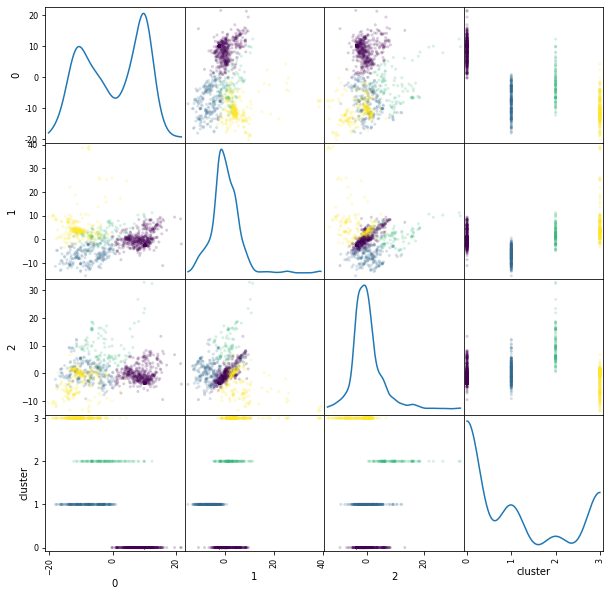

In [184]:
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(10, 10), diagonal='kde', c=Labels, cmap='viridis')

#### LDA

In [208]:
producteurs_np_clean=[]
bar.start()
for i in range(len(producteurs_np)):
    producteurs_np_clean.append(basic_tokenizer(producteurs_np[i]))
    bar.update(i+1)
bar.finish()

In [216]:
vectorizer_prod = CountVectorizer(min_df=3, max_df=5000, lowercase=True, strip_accents='unicode', ngram_range=(2,3))
data_vectorized_prod = vectorizer_prod.fit_transform(producteurs_np_clean)

In [217]:
# Latent Dirichlet Allocation Model
lda = LatentDirichletAllocation(n_components=10, max_iter=50, evaluate_every=5, verbose=True)
data_lda = lda.fit_transform(data_vectorized_prod)

iteration: 1 of max_iter: 50
iteration: 2 of max_iter: 50
iteration: 3 of max_iter: 50
iteration: 4 of max_iter: 50
iteration: 5 of max_iter: 50, perplexity: 84.0510
iteration: 6 of max_iter: 50
iteration: 7 of max_iter: 50
iteration: 8 of max_iter: 50
iteration: 9 of max_iter: 50
iteration: 10 of max_iter: 50, perplexity: 83.7759
iteration: 11 of max_iter: 50
iteration: 12 of max_iter: 50
iteration: 13 of max_iter: 50
iteration: 14 of max_iter: 50
iteration: 15 of max_iter: 50, perplexity: 83.7759


In [218]:
print("LDA Model:")
selected_topics(lda, vectorizer_prod)

LDA Model:
Topic 0:
[('direction departementale', 42.09998667619737), ('direction departementale territoires', 39.09998885815794), ('departementale territoires', 39.09998885815794), ('syndicat mixte', 15.099584568356343), ('departementale territoires mer', 10.099991268153646), ('territoires mer', 10.099991268153646), ('val loire', 5.099999980576608), ('centre val loire', 4.099999987599447), ('centre val', 4.099999987599447), ('agence technique', 4.09999997831162)]
Topic 1:
[('agence nationale', 10.099999993447431), ('parc regional', 4.099999993029592), ('haute autorite', 3.099999992782041), ('federation nationale', 3.099999992782041), ('parc national', 3.099999992782041), ('syndicat mixte', 0.10000000903572528), ('loire atlantique', 0.10000000702172915), ('communaute agglomeration', 0.10000000535252425), ('pays loire', 0.10000000534467204), ('nouvelle aquitaine', 0.10000000534467204)]
Topic 2:
[('communaute agglomeration', 40.099993737888745), ('commune saint', 11.09999997304475), ('in

In [219]:
pyLDAvis.enable_notebook()
dash = pyLDAvis.sklearn.prepare(lda, data_vectorized_prod, vectorizer_prod, mds='tsne')
dash

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
0      32.420952   8.115230       1        1  25.225743
2       0.648955  71.707100       2        1  14.076109
8      71.019684   9.971006       3        1   9.814413
6       3.785981  33.185135       4        1   9.009546
3     -42.666500  -9.222070       5        1   8.356491
4      -3.621689 -43.526516       6        1   8.157369
7      -3.632402  -4.171708       7        1   7.025472
9     -36.584400  35.804413       8        1   6.785357
5      44.391380  50.615383       9        1   6.627498
1      40.235809 -31.591665      10        1   4.922003, topic_info=                                    Term       Freq      Total Category  \
24                   communaute communes  26.000000  26.000000  Default   
20              communaute agglomeration  35.000000  35.000000  Default   
38              direction departementale  35.000000  35.000000  Default   
39  direction departementale territoires  33.000000  33.000000  Default   
36            departementale territoires  33.000000  33.000000  Default   
..                                   ...        ...        ...      ...   
71                             open data   0.095763   6.162895  Topic10   
48                  etablissement public   0.095763   7.040679  Topic10   
92                syndicat intercommunal   0.095763   7.454412  Topic10   
15                      caisse nationale   0.095763   4.635304  Topic10   
63                     institut national   0.095763   9.033898  Topic10   

    logprob  loglift  
24  30.0000  30.0000  
20  29.0000  29.0000  
38  28.0000  28.0000  
39  27.0000  27.0000  
36  26.0000  26.0000  
..      ...      ...  
71  -5.8021  -1.1530  
48  -5.8021  -1.2861  
92  -5.8021  -1.3432  
15  -5.8021  -0.8681  
63  -5.8021  -1.5354  

[477 rows x 6 columns], token_table=      Topic      Freq                             Term
term                                                  
0         7  0.800868                       agence eau
1        10  0.954878                 agence nationale
2         1  0.715464                 agence technique
3         1  0.890509  agence technique departementale
4         4  0.907579              agglomeration grand
...     ...       ...                              ...
96        6  0.831310                  tarn et garonne
97        1  0.890509         technique departementale
98        1  0.875425                  territoires mer
99        1  0.797241                        val loire
100       6  0.886338                      ville saint

[109 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 9, 7, 4, 5, 8, 10, 6, 2])

### Vectorizer read documentation again

In [40]:
vectorizer = CountVectorizer(min_df=10, max_df=5000, lowercase=True, strip_accents='unicode', ngram_range=(1,2))
data_vectorized = vectorizer.fit_transform(data_np_nostop)

### LDA read documentation and paper again

In [45]:
NUM_TOPICS = 40

In [46]:
# Latent Dirichlet Allocation Model
lda = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=50, evaluate_every=5, verbose=True)
data_lda = lda.fit_transform(data_vectorized)

iteration: 1 of max_iter: 50
iteration: 2 of max_iter: 50
iteration: 3 of max_iter: 50
iteration: 4 of max_iter: 50
iteration: 5 of max_iter: 50, perplexity: 685.0409
iteration: 6 of max_iter: 50
iteration: 7 of max_iter: 50
iteration: 8 of max_iter: 50
iteration: 9 of max_iter: 50
iteration: 10 of max_iter: 50, perplexity: 646.7538
iteration: 11 of max_iter: 50
iteration: 12 of max_iter: 50
iteration: 13 of max_iter: 50
iteration: 14 of max_iter: 50
iteration: 15 of max_iter: 50, perplexity: 641.7757
iteration: 16 of max_iter: 50
iteration: 17 of max_iter: 50
iteration: 18 of max_iter: 50
iteration: 19 of max_iter: 50
iteration: 20 of max_iter: 50, perplexity: 640.7221
iteration: 21 of max_iter: 50
iteration: 22 of max_iter: 50
iteration: 23 of max_iter: 50
iteration: 24 of max_iter: 50
iteration: 25 of max_iter: 50, perplexity: 640.1533
iteration: 26 of max_iter: 50
iteration: 27 of max_iter: 50
iteration: 28 of max_iter: 50
iteration: 29 of max_iter: 50
iteration: 30 of max_iter: 50

In [33]:
np.save('../../data/data_ldav5_nondesc_40.npy', data_lda, allow_pickle=True)

In [205]:
# Keywords for each topic
def selected_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]]) 

In [48]:
print("LDA Model:")
selected_topics(lda, vectorizer)

LDA Model:
Topic 0:
[('mayenne', 611.0249999999932), ('pedologiques', 540.0249999999952), ('dechets', 390.2947605665985), ('etude', 389.568392265136), ('cartes', 350.5778022735507), ('cd', 320.0249999999905), ('types', 306.9994104435713), ('53', 296.0249999999953), ('cd 53', 290.02499999999736), ('etudes', 284.75184115742314)]
Topic 1:
[('plu', 2630.925239007684), ('cadastre plu', 1295.0249999999753), ('urbanisme', 1240.2521009789054), ('plu usage', 1090.0249999999958), ('durbanisme', 955.0250000000041), ('plan', 742.7594754511998), ('local', 716.0617041091658), ('plan local', 663.0249999999922), ('local urbanisme', 638.024999999998), ('prescription', 564.9228681740559)]
Topic 2:
[('sites', 645.3043962671239), ('servitudes', 505.0249999999904), ('protection', 339.9523811744969), ('proteges', 337.2628914626899), ('sites proteges', 322.94400406531884), ('servitude', 249.64131766422247), ('vie', 236.21458635317978), ('environnement', 223.11094479040017), ('cadre', 215.20467369884358), ('e

[('inondation', 681.9345199480829), ('pprn', 615.7564234346714), ('information inondation', 335.0432388678406), ('pprn inondation', 200.8941406849041), ('perimetre', 177.79987663015575), ('ppr', 173.09904609847106), ('eure', 149.42692957286198), ('monuments', 147.3935475087467), ('ddt', 144.75451721867756), ('historique', 127.51139451664221)]
Topic 33:
[('inondation', 1365.3355655925604), ('ppr', 1131.6310340473185), ('zonages usage', 1023.0249999999753), ('alea', 790.4182380346394), ('prevention', 788.5248411017831), ('plan prevention', 778.4342714040791), ('plan', 776.8945748075597), ('prevention inondation', 764.396974143391), ('enjeux', 555.1428916350719), ('gestion', 543.5718986525038)]
Topic 34:
[('gestion', 608.1900208927889), ('ppr', 595.2646190030963), ('surfaciques', 552.9801248519996), ('naturels', 537.4039535340702), ('plan', 535.7278062316713), ('ppr zonages', 526.0249999999915), ('plan prevention', 522.4338362833817), ('prevention', 520.7222633221913), ('prevention nature

In [49]:
pyLDAvis.enable_notebook()
dash = pyLDAvis.sklearn.prepare(lda, data_vectorized, vectorizer, mds='tsne')
dash

PreparedData(topic_coordinates=                x           y  topics  cluster      Freq
topic                                                   
33      64.522385  -84.003983       1        1  4.103685
35     100.558540  -79.873184       2        1  3.959954
38      80.320847   49.467510       3        1  3.686172
39     -83.603996  -53.600983       4        1  3.621214
31     -22.663853  -53.520481       5        1  3.505752
1       35.243488 -116.067368       6        1  3.341970
9     -115.196617  -38.048359       7        1  3.188376
10     -18.965260   10.272019       8        1  3.147135
3        9.464589   67.074234       9        1  3.011288
6       39.836884  -50.808823      10        1  2.975699
12      10.584939 -133.515305      11        1  2.941791
11     -27.997601   72.444679      12        1  2.826020
21     114.251915  -49.953098      13        1  2.799103
22      54.303555   36.025433      14        1  2.563423
25     -25.966480   47.317509      15        1  2.562934
14      78.395851  -56.984566      16        1  2.512398
16     -42.438404  -68.982697      17        1  2.465996
27       6.982453   28.653013      18        1  2.391332
30      86.342316   18.883806      19        1  2.341732
23     -49.730526   20.769154      20        1  2.317580
34      85.747215 -107.962143      21        1  2.314447
18     -75.888611  -26.956713      22        1  2.296796
5       36.443951   11.608155      23        1  2.282293
0       76.781281   91.984337      24        1  2.213828
15     -64.066376  -93.015327      25        1  2.190150
19      17.260630  -80.735100      26        1  2.181258
2      -35.301971  -17.939869      27        1  2.141028
4      -65.752579   56.701656      28        1  2.115188
20      34.295471  107.391197      29        1  2.061489
17       1.383629  -39.831673      30        1  2.052994
36       9.893842   -9.308251      31        1  2.027007
13    -101.396332    5.519994      32        1  1.989764
28     -11.721306  -98.427612      33        1  1.927009
37    -115.537910   52.234089      34        1  1.824545
8       52.397453  -18.215454      35        1  1.820444
26     -59.140255   93.636909      36        1  1.775865
32      79.027916  -22.329983      37        1  1.759604
24     -14.471107  102.535347      38        1  1.644268
29     -84.483604   28.360506      39        1  1.642406
7       37.145508   63.703186      40        1  1.476063, topic_info=             Term         Freq        Total Category  logprob  loglift
6560          plu  3246.000000  3246.000000  Default  30.0000  30.0000
4728   inondation  4277.000000  4277.000000  Default  29.0000  29.0000
6511         plan  4836.000000  4836.000000  Default  28.0000  28.0000
3026          eau  2837.000000  2837.000000  Default  27.0000  27.0000
1418       budget  2696.000000  2696.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
7349  referentiel   125.377367   271.411560  Topic40  -4.1788   3.4435
7310    recherche   104.601085   685.301519  Topic40  -4.3600   2.3361
3989    formation    91.195192   821.541055  Topic40  -4.4971   2.0176
6612       points    71.725224   674.199372  Topic40  -4.7373   1.9751
7652      routier    63.351201   367.808781  Topic40  -4.8614   2.4569

[2122 rows x 6 columns], token_table=      Topic      Freq                    Term
term                                         
0        11  0.163873                      01
0        13  0.209873                      01
0        20  0.008625                      01
0        21  0.615244                      01
0        32  0.002875                      01
...     ...       ...                     ...
9193     10  0.658522   zonages planification
9193     26  0.336578   zonages planification
9194     29  0.995414  zonages reglementaires
9200      1  0.999138           zonages usage
9201     13  0.992125         zonages zonages

[3751 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1',

In [60]:
# Transforming an individual sentence
text = spacy_tokenizer("reseau transport bus horaires adresse voirie arrêts")
x = lda.transform(vectorizer.transform([text]))[0]
print(x)

[0.0025     0.0025     0.0025     0.0025     0.0025     0.0025
 0.0025     0.0025     0.0025     0.0025     0.0025     0.0025
 0.0025     0.0025     0.0025     0.0025     0.0025     0.0025
 0.0025     0.0025     0.0025     0.0025     0.21466003 0.0025
 0.0025     0.0025     0.0025     0.0025     0.0025     0.0025
 0.0025     0.0025     0.0025     0.0025     0.0025     0.0025
 0.0025     0.0025     0.69033997 0.0025    ]


In [61]:
data_lda.shape

(42838, 40)

In [62]:
from scipy import spatial
A = data_lda
tree = spatial.KDTree(A)
tree.query(x)

(0.036395727662525794, 33977)

In [64]:
data_lda[33977]

array([0.00147059, 0.00147059, 0.00147059, 0.00147059, 0.00147059,
       0.00147059, 0.00147059, 0.00147059, 0.00147059, 0.00147059,
       0.00147059, 0.00147059, 0.00147059, 0.00147059, 0.00147059,
       0.00147059, 0.00147059, 0.00147059, 0.00147059, 0.00147059,
       0.00147059, 0.00147059, 0.21810542, 0.00147059, 0.00147059,
       0.00147059, 0.00147059, 0.00147059, 0.00147059, 0.00147059,
       0.00147059, 0.00147059, 0.00147059, 0.00147059, 0.00147059,
       0.00147059, 0.00147059, 0.00147059, 0.72601223, 0.00147059])

In [50]:
# Non-Negative Matrix Factorization Model
nmf = NMF(n_components=NUM_TOPICS)
data_nmf = nmf.fit_transform(data_vectorized) 

In [51]:
print("NMF Model:")
selected_topics(nmf, vectorizer)

NMF Model:
Topic 0:
[('naturels', 6.690459814758578), ('prevention naturels', 6.363634050934495), ('prevention', 5.929274208722528), ('plan prevention', 5.702648634745889), ('plan', 5.694749226707509), ('surfaciques', 1.797714074273231), ('ppr zonages', 1.6806251097502574), ('naturels pprn', 1.5112748039696662), ('perimetres', 1.4692899188734683), ('reglementees', 1.3840836688038782)]
Topic 1:
[('finances', 6.1499842789060075), ('loi', 3.826353820060777), ('loi finances', 3.5859651884114543), ('budget', 2.2942641746682555), ('letat', 1.9247598405520463), ('budget letat', 1.911860108136004), ('plf', 1.8272278501365435), ('lfi', 1.6807594120469331), ('finances plf', 1.6659717774696188), ('initiale', 1.6086569421441634)]
Topic 2:
[('inondation', 4.453352770957376), ('alea', 4.304968500394719), ('gestion', 4.24856672614686), ('restriction', 4.067504032532299), ('gestion restriction', 4.060658718253241), ('amenagement', 4.051610343743563), ('ppr', 3.7070825811937387), ('enjeux', 3.637275815

[('tourisme', 4.665738753214845), ('culture', 3.800791419737809), ('patrimoine', 3.0379628843956157), ('sport', 1.5483006176397778), ('equipements', 1.3658856535967059), ('loisirs', 1.330851416004663), ('sport tourisme', 0.6830271565286117), ('hebergement', 0.6033091921625671), ('art', 0.5464016052982253), ('culture tourisme', 0.5432976398958819)]
Topic 32:
[('immigration', 4.691719887244389), ('aide', 1.3194236404854325), ('etrangers', 1.2899579347380437), ('irreguliere', 1.1723638515457813), ('travail', 1.1654175984408084), ('migrant', 1.1620597850052672), ('frontiere', 1.1355600853949093), ('immigration irreguliere', 1.1010992825151602), ('immigre', 1.0852827222208539), ('espace', 1.0770976307931563)]
Topic 33:
[('citoyennete', 4.257746321408477), ('administration', 3.7085931661544684), ('finances', 3.701528613156891), ('gouvernement', 2.4381002665204194), ('finances gouvernement', 1.8748151312835646), ('administration citoyennete', 1.3983307911457268), ('citoyennete finances', 0.84